In [5]:
import matplotlib.pyplot as plt

In [6]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [7]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

#### 산점도
x, y축으로 이뤄진 좌표계에 두 변수 **(x, y)의 관계**를 표현하는 방법입니다.

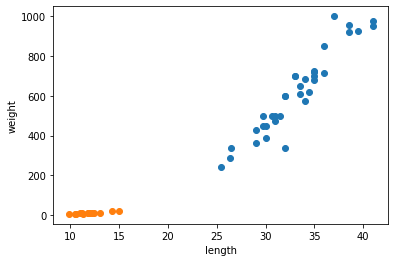

In [8]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### k-최근접 이웃 알고리즘
1) 가장 가까운 이웃간의 distance measure 측정 <br>
2) 거리가 가까운 이웃 k개를 찾음 <br>
3) 다수결의 원칙으로 신규 데이터 label 찾음 <br>

In [9]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight
fish_data = [[l, w] for l, w in zip(length, weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [10]:
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### scikit-learn
1) KNeighborsClassifier()는 k-최근접 이웃 분류 모델을 만드는 사이킷런 클래스, n_neighbors 매개변수로 이웃의 개수를 지정 <br>
    p = 1, 맨해튼 거리 https://ko.wikipedia.org/wiki/%EB%A7%A8%ED%95%B4%ED%8A%BC_%EA%B1%B0%EB%A6%AC <br>
    p = 2, 유클리디안 거리 https://ko.wikipedia.org/wiki/%EC%9C%A0%ED%81%B4%EB%A6%AC%EB%93%9C_%EA%B1%B0%EB%A6%AC <br>
    
2) fit() 사이킷런 훈련 시 사용 메서드 <br>
3) predict() 사이킷런 모델 훈련하고 예측 시 사용 메서드 <br>
4) score() 훈련된 사이킷런 모델 성능 측정 <br>

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)
kn.score(fish_data, fish_target)

1.0

In [22]:
kn.predict([[30, 600]])

array([1])

In [26]:
kn49 = KNeighborsClassifier(n_neighbors=49)
k5 = KNeighborsClassifier(n_neighbors=5)

In [28]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [29]:
k5.fit(fish_data, fish_target)
kn.score(fish_data, fish_target)

1.0

#### 연습코드

In [31]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for n in range(5, 50):
    # k-최근접 이웃 개수 설정
    kn.n_neighbors = n
    # 점수 계산
    score = kn.score(fish_data, fish_target)
    if score < 1:
        print(n, score)
        break

18 0.9795918367346939
